# **Case Study: How Does a Bike-Share Navigate Speedy Success?**

Author: Reno Hidayat

Date: 8 August 2023

Method: Ask - Prepare - Analyze - Share - Act

Tools: R

**Scenario**
My role is a junior data analyst working in the marketing analyst team at Cyclistic bike share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual rides and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve my recommendations, so they must be backed up with compelling data insights and professional data visualizations.

**About the company**
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs. Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.


# **Ask**
Business Taks: Convert casual riders into annual members
The goal is to design the marketing strategies at converting casual riders into annual members. My task is to answer one of the three questions that will guide the future marketing program - How do annual members and casual members use the bicycle bikes differently?

# **Prepare**
Data source: The data sets of previous 6 months of trip data can be downloaded [here](https://divvy-tripdata.s3.amazonaws.com/index.html).

NOTE: As the data source files are larger, I used the data consisting of 6 months in 2023. I used R studio to combine the two large datasets which consists of 1 million rows of combining 2020-2021
* 6 csv. Files
* 13 variables.
* The data has been made available by motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement)
* This is public data.

**ROCCC Analysis**
* Reliable - yes, not biased, the data is cleaned, given by the certificate course.
* Original - yes, can locate the original public data.
* Comprehensive - yes, not missing important information.
* Current - yes.
* Cited - yes.


In [3]:
#library
library(tidyverse) #help wrangle data
library(lubridate) #help wrangle data attributes
library(ggplot2) #help visualize data
library(dplyr) #help clean data
library(tidyr) #help clean data
library(geosphere) #spherical trigonmetry

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [4]:
#importing csv files from january until june in 2023 (6 month)
getwd() #checking working directory
january2023 <- read.csv("/kaggle/input/cyclistic-bike/202301-divvy-tripdata.csv")
february2023 <- read.csv("/kaggle/input/cyclistic-bike/202302-divvy-tripdata.csv")
march2023 <- read.csv("/kaggle/input/cyclistic-bike/202303-divvy-tripdata.csv")
april2023 <- read.csv("/kaggle/input/cyclistic-bike/202304-divvy-tripdata.csv")
may2023 <- read.csv("/kaggle/input/cyclistic-bike/202305-divvy-tripdata.csv")
june2023 <- read.csv("/kaggle/input/cyclistic-bike/202306-divvy-tripdata.csv")

[1] "/kaggle/working"

In [5]:
#checking data
colnames(january2023)
colnames(february2023)
colnames(march2023)
colnames(april2023)
colnames(may2023)
colnames(june2023)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [6]:
#checking data
str(january2023)
str(february2023)
str(march2023)
str(april2023)
str(may2023)
str(june2023)

'data.frame':	190301 obs. of  13 variables:
 $ ride_id           : chr  "F96D5A74A3E41399" "13CB7EB698CEDB88" "BD88A2E670661CE5" "C90792D034FED968" ...
 $ rideable_type     : chr  "electric_bike" "classic_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2023-01-21 20:05:42" "2023-01-10 15:37:36" "2023-01-02 07:51:57" "2023-01-22 10:52:58" ...
 $ ended_at          : chr  "2023-01-21 20:16:33" "2023-01-10 15:46:05" "2023-01-02 08:05:11" "2023-01-22 11:01:44" ...
 $ start_station_name: chr  "Lincoln Ave & Fullerton Ave" "Kimbark Ave & 53rd St" "Western Ave & Lunt Ave" "Kimbark Ave & 53rd St" ...
 $ start_station_id  : chr  "TA1309000058" "TA1309000037" "RP-005" "TA1309000037" ...
 $ end_station_name  : chr  "Hampden Ct & Diversey Ave" "Greenwood Ave & 47th St" "Valli Produce - Evanston Plaza" "Greenwood Ave & 47th St" ...
 $ end_station_id    : chr  "202480.0" "TA1308000002" "599" "TA1308000002" ...
 $ start_lat         : num  41.9 41.8 42 41.8 41.8 ...
 $ start_lng  

In [7]:
#create new columns that are functions of existing variables
january2023 <-  mutate(january2023, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
february2023 <- mutate(february2023,start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
march2023 <- mutate(march2023,start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
april2023 <- mutate(april2023,start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
may2023 <- mutate(may2023,start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
june2023 <- mutate(june2023,start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))


In [8]:
#combining of the rows dataset
six_month2023 <- bind_rows(january2023, february2023, march2023, april2023, may2023, june2023)
View(six_month2023)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.92407,-87.64628,41.93000,-87.64000,member
13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.00857,-87.69048,42.03974,-87.69941,casual
C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.92607,-87.63886,41.93000,-87.64000,member
2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79955,-87.59462,41.80983,-87.59938,member
DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79959,-87.59467,41.80983,-87.59938,member


# **Process**

Data cleaning before analysis

Due to the large dataset, I will use R for data cleaning and data analysis


In [9]:
#process (data cleaning)
colnames(six_month2023) #list of column names
nrow(six_month2023) #many rows in data frame
dim(six_month2023) #dimension of data frame
head(six_month2023) #6 rows of data frame

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 2390459

[1] 2390459      13

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.92407,-87.64628,41.93000,-87.64000,member
2,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
3,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.00857,-87.69048,42.03974,-87.69941,casual
4,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
5,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
6,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.92607,-87.63886,41.93000,-87.64000,member


In [10]:
str(six_month2023) #Check a list of columns and data types (numeric, character, etc)

'data.frame':	2390459 obs. of  13 variables:
 $ ride_id           : chr  "F96D5A74A3E41399" "13CB7EB698CEDB88" "BD88A2E670661CE5" "C90792D034FED968" ...
 $ rideable_type     : chr  "electric_bike" "classic_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2023-01-21 20:05:42" "2023-01-10 15:37:36" "2023-01-02 07:51:57" "2023-01-22 10:52:58" ...
 $ ended_at          : chr  "2023-01-21 20:16:33" "2023-01-10 15:46:05" "2023-01-02 08:05:11" "2023-01-22 11:01:44" ...
 $ start_station_name: chr  "Lincoln Ave & Fullerton Ave" "Kimbark Ave & 53rd St" "Western Ave & Lunt Ave" "Kimbark Ave & 53rd St" ...
 $ start_station_id  : chr  "TA1309000058" "TA1309000037" "RP-005" "TA1309000037" ...
 $ end_station_name  : chr  "Hampden Ct & Diversey Ave" "Greenwood Ave & 47th St" "Valli Produce - Evanston Plaza" "Greenwood Ave & 47th St" ...
 $ end_station_id    : chr  "202480.0" "TA1308000002" "599" "TA1308000002" ...
 $ start_lat         : num  41.9 41.8 42 41.8 41.8 ...
 $ start_lng 

In [11]:
summary(six_month2023)  #Statistical summary of data. Mainly for numerics

   ride_id          rideable_type       started_at          ended_at        
 Length:2390459     Length:2390459     Length:2390459     Length:2390459    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:2390459     Length:2390459     Length:2390459     Length:2390459    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [12]:
# Add columns that list the date, month, day, and year of each ride as we might need to aggregate ride data for each month, day, or year.
six_month2023$date <- as.Date(six_month2023$started_at) #The default format is yyyy-mm-dd
six_month2023$month <- format(as.Date(six_month2023$date), "%m")
six_month2023$day <- format(as.Date(six_month2023$date), "%d")
six_month2023$year <- format(as.Date(six_month2023$date), "%Y")
six_month2023$day_of_week <- format(as.Date(six_month2023$date), "%A")

In [13]:
#Confirmed additional columns have been added
colnames(six_month2023)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "date"               "month"             
[16] "day"                "year"               "day_of_week"

In [14]:
# Add a "ride_length" calculation to all_trips (in seconds) so that I can compare ride length for each ride
# function difftime is difference between two objects of date or time
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html
six_month2023$ride_length <- difftime(six_month2023$ended_at,six_month2023$started_at)

In [15]:
# Convert "ride_length" from Double to numeric so we can run calculations on the data
six_month2023$ride_length <- as.numeric(as.character(six_month2023$ride_length))
is.numeric(six_month2023$ride_length)

[1] TRUE

**Remove Bad Data**
1. Remove ride length is less than 0 second and is > 1440 minutes as ride length shouldn't be either negative or more than one day.

In [16]:
# Remove "bad" data
# The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
#Create a new data frame without records that have ride length <= zero minute OR > 1440 minutes
six_month2023_v2 <- six_month2023[!(six_month2023$ride_length <= 0 | six_month2023$ride_length > 1440),]


In [17]:
#Check the new data frame
dim(six_month2023_v2) 
View(six_month2023_v2)
summary(six_month2023_v2)
#Confirmed the total number of rows is 2,061,428

[1] 2061428      19

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week,ride_length
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.92407,-87.64628,41.93000,-87.64000,member,2023-01-21,01,21,2023,Saturday,651
2,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member,2023-01-10,01,10,2023,Tuesday,509
3,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.00857,-87.69048,42.03974,-87.69941,casual,2023-01-02,01,02,2023,Monday,794
4,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member,2023-01-22,01,22,2023,Sunday,526
5,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member,2023-01-12,01,12,2023,Thursday,919
6,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.92607,-87.63886,41.93000,-87.64000,member,2023-01-31,01,31,2023,Tuesday,193
7,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79955,-87.59462,41.80983,-87.59938,member,2023-01-15,01,15,2023,Sunday,840
8,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member,2023-01-25,01,25,2023,Wednesday,561
9,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79959,-87.59467,41.80983,-87.59938,member,2023-01-25,01,25,2023,Wednesday,747


   ride_id          rideable_type       started_at          ended_at        
 Length:2061428     Length:2061428     Length:2061428     Length:2061428    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:2061428     Length:2061428     Length:2061428     Length:2061428    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [18]:
#Drop all NAs
six_month2023_v2 <- drop_na(six_month2023_v2)
dim(six_month2023_v2) 
summary(six_month2023_v2)
# Confirmed all the NA is gone.

[1] 2061373      19

   ride_id          rideable_type       started_at          ended_at        
 Length:2061373     Length:2061373     Length:2061373     Length:2061373    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:2061373     Length:2061373     Length:2061373     Length:2061373    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [19]:
#Remove duplicated ID (confirmed different ride_id is assigned for every rides even if same rider uses this service):
six_month2023_v3 <- six_month2023_v2[!duplicated(six_month2023_v2$ride_id),]
dim(six_month2023_v3) 
# Confirmed 2,563,234 remained (Original data has 3,850,936 >>> Valid)

[1] 2061373      19

Data Cleaning/Validation process has been completed at this point.

Next, I am going to create additional columns for further analysis.

In [20]:
#Find out the distance for each ride:
six_month2023_v3$ride_distance <- distGeo(matrix(c(six_month2023_v3$start_lng,
                                                  six_month2023_v3$start_lat), ncol = 2), 
                                                      matrix(c(six_month2023_v3$end_lng,six_month2023_v3$end_lat),
                                                        ncol = 2))
View(six_month2023_v3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week,ride_length,ride_distance
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.92407,-87.64628,41.93000,-87.64000,member,2023-01-21,01,21,2023,Saturday,651,839.3128
2,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member,2023-01-10,01,10,2023,Tuesday,509,1203.6739
3,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.00857,-87.69048,42.03974,-87.69941,casual,2023-01-02,01,02,2023,Monday,794,3540.3923
4,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member,2023-01-22,01,22,2023,Sunday,526,1203.6739
5,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member,2023-01-12,01,12,2023,Thursday,919,1203.6739
6,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.92607,-87.63886,41.93000,-87.64000,member,2023-01-31,01,31,2023,Tuesday,193,446.7872
7,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79955,-87.59462,41.80983,-87.59938,member,2023-01-15,01,15,2023,Sunday,840,1208.6923
8,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member,2023-01-25,01,25,2023,Wednesday,561,1203.6739
9,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79959,-87.59467,41.80983,-87.59938,member,2023-01-25,01,25,2023,Wednesday,747,1203.6824


# **Analyze**

First, find out the number of ride by type rider.

In [21]:
#Assign the correct order to each day of the week
six_month2023_v3$day_of_week <- 
    ordered(six_month2023_v3$day_of_week, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

In [22]:
six_month2023_v3 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(number_of_ride = n(), .groups = 'drop') %>%
    arrange(day_of_week)

member_casual,day_of_week,number_of_ride
<chr>,<ord>,<int>
casual,Monday,73050
member,Monday,191097
casual,Tuesday,80173
member,Tuesday,229361
casual,Wednesday,87508
member,Wednesday,236560
casual,Thursday,93234
member,Thursday,233699
casual,Friday,101874


In [23]:
#Assign the correct order to each month of the year
six_month2023_v3$month <-
    ordered(six_month2023_v3$month, levels = c('05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04'))

In [24]:
six_month2023_v3 %>%
    group_by(member_casual, month) %>%
    summarise(number_of_ride = n(), .groups = 'drop') %>%
    arrange(month)

member_casual,month,number_of_ride
<chr>,<ord>,<int>
casual,05,174691
member,05,330358
casual,06,227618
member,06,371516
casual,01,36061
member,01,141107
casual,02,37004
member,02,137087
casual,03,53963


**Findings:**

1. Casual riders are more likely to take a ride on weekend while membership riders use on weekday more often.
2. Summer is the peak season for both rider types

Now, I would like to find out whether ride_length can be different depends on rider type.

In [25]:
aggregate(six_month2023_v3$ride_length ~ six_month2023_v3$member_casual + six_month2023_v3$day_of_week, FUN=mean)

six_month2023_v3$member_casual,six_month2023_v3$day_of_week,six_month2023_v3$ride_length
<chr>,<ord>,<dbl>
casual,Monday,583.6249
member,Monday,505.0554
casual,Tuesday,570.7589
member,Tuesday,512.4605
casual,Wednesday,574.1762
member,Wednesday,518.7283
casual,Thursday,585.3036
member,Thursday,521.1361
casual,Friday,602.3691


In [27]:
six_month2023_v3 %>%
    group_by(member_casual, month) %>%
    summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
    arrange(month)
    

member_casual,month,average_ride_length
<chr>,<ord>,<dbl>
casual,05,625.0013
member,05,546.9639
casual,06,639.8445
member,06,565.3517
casual,01,498.9908
member,01,469.1888
casual,02,527.0690
member,02,474.9130
casual,03,529.3981


**Findings:**

1. Membership rider's trip is longer than casual ones regardless of the season or day
2. All users take longer trips over weekend and summer

Next, check whether how each type of rider use the bike by looking at ride distance.

In [28]:
six_month2023_v3 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(distance_of_ride = mean(ride_distance), .groups = 'drop') %>%
    arrange(day_of_week)

member_casual,day_of_week,distance_of_ride
<chr>,<ord>,<dbl>
casual,Monday,1674.757
member,Monday,1717.458
casual,Tuesday,1715.626
member,Tuesday,1755.630
casual,Wednesday,1733.142
member,Wednesday,1779.273
casual,Thursday,1855.655
member,Thursday,1819.371
casual,Friday,1707.167


In [30]:
six_month2023_v3 %>%
    group_by(member_casual, month) %>%
    summarise(distance_of_ride = mean(ride_distance), .groups = 'drop') %>%
    arrange(month)

member_casual,month,distance_of_ride
<chr>,<ord>,<dbl>
casual,05,1756.713
member,05,1842.595
casual,06,1845.245
member,06,1920.028
casual,01,1504.085
member,01,1563.543
casual,02,1562.009
member,02,1585.680
casual,03,1578.613


**Findings:**

1. While Casual rider has slightly longer distance trip on weekday, membership ride's slighly longer over weekend.
2. All users take slightly longer distance trip in Spring

Finaly, in order to support my assumption, let's find out how many riders use the same bike station for start point and end point (ride_distance = 0).

In [31]:
six_month2023_v3 %>%
    group_by(member_casual) %>%
    summarise(number_of_rides = n() , .groups = 'drop')

member_casual,number_of_rides
<chr>,<int>
casual,643698
member,1417675


In [32]:
six_month2023_v3 %>%
    group_by(member_casual) %>%
    filter(ride_distance < 1) %>%
    summarise(number_of_rides = n() , .groups = 'drop')

member_casual,number_of_rides
<chr>,<int>
casual,43689
member,49202


**Finding:**

While 6% of casual riders return their bike to their start point station, 4% of membership rider returns at their start point station.

# **Share**

Here, I would like to share visualizations which would allow executives to understand my conclusion easily.

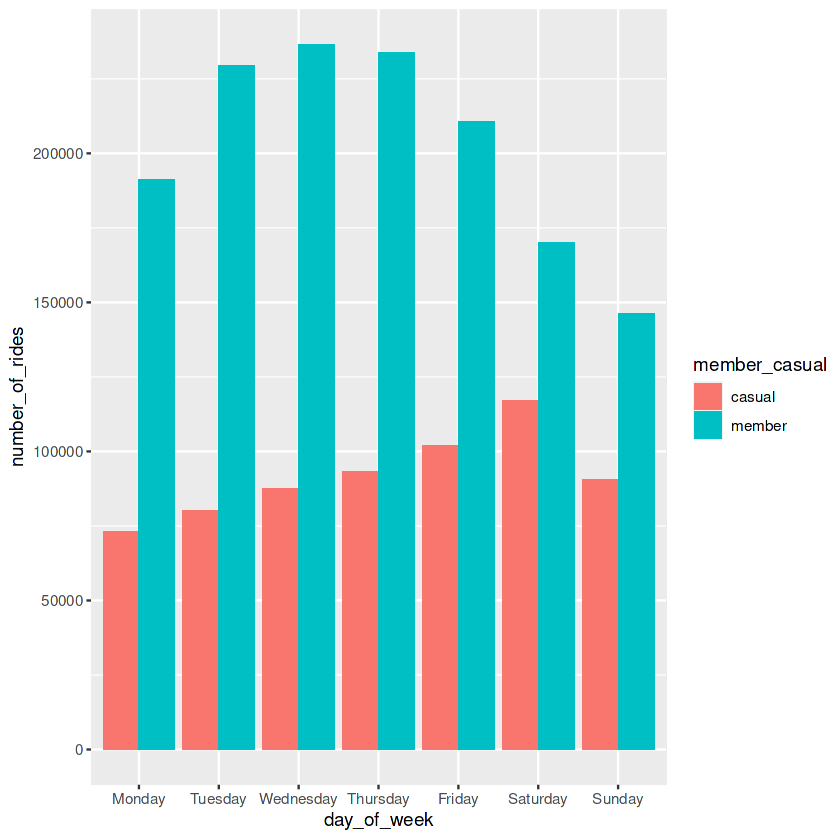

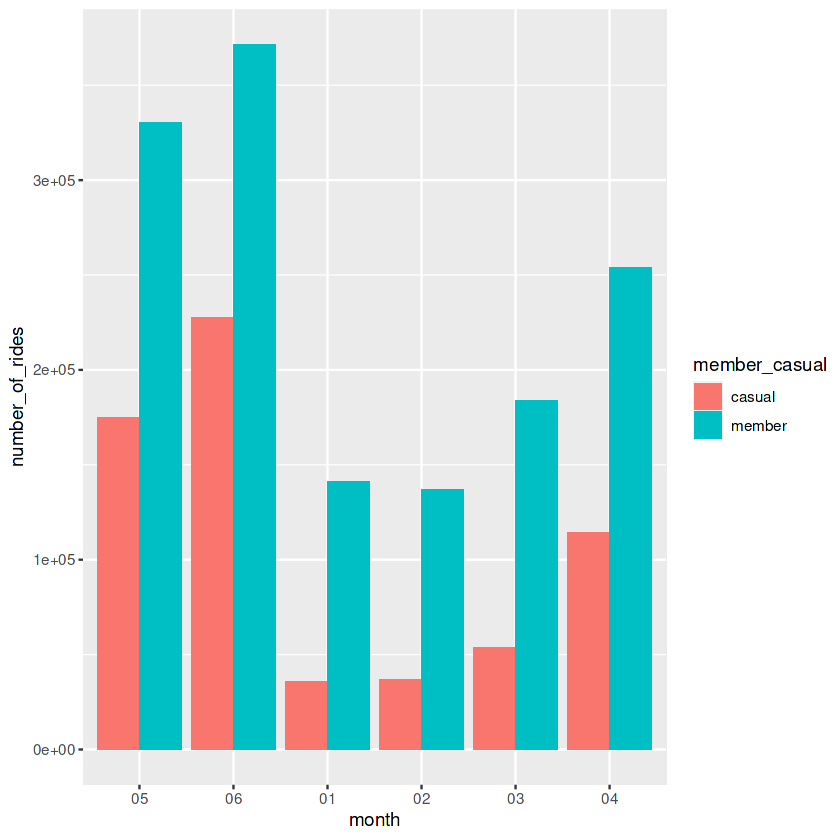

In [39]:
six_month2023_v3 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(number_of_rides = n(), .groups = 'drop') %>%
    ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

six_month2023_v3 %>%
    group_by(member_casual, month) %>%
    summarise(number_of_rides = n(), .groups = 'drop') %>%
    ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

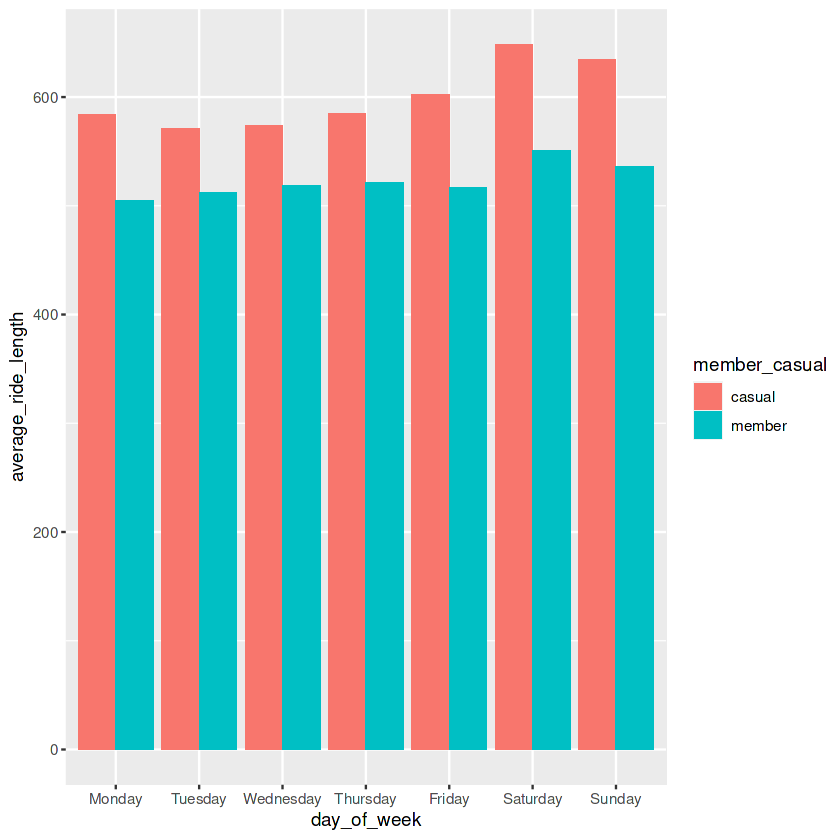

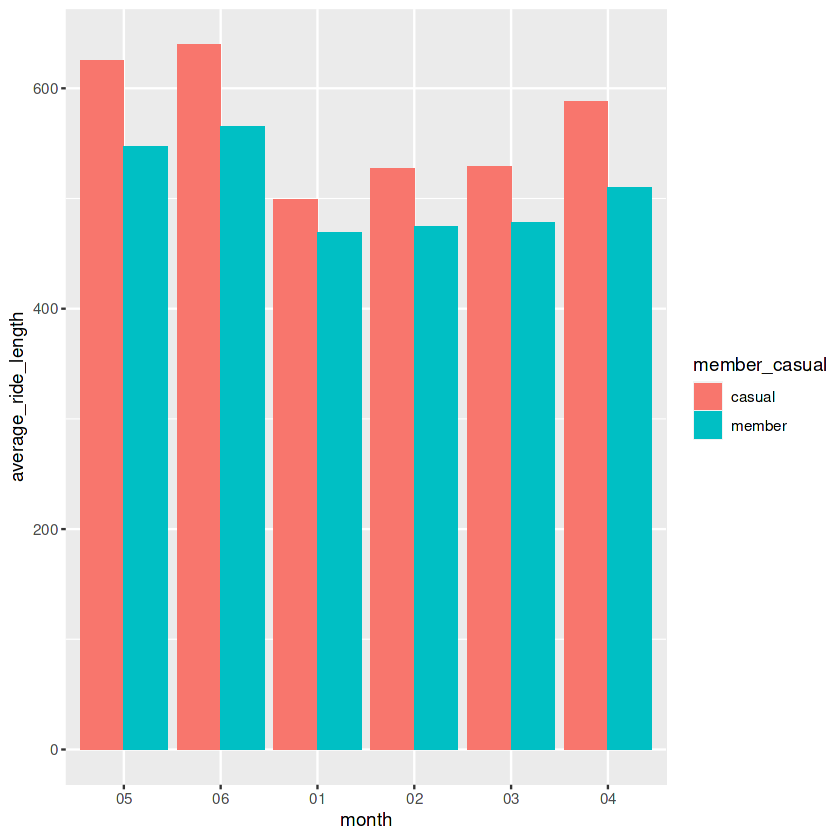

In [46]:
six_month2023_v3 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
    ggplot(aes(x = day_of_week, y = average_ride_length, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

six_month2023_v3 %>%
    group_by(member_casual, month) %>%
    summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
    ggplot(aes(x = month, y = average_ride_length, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


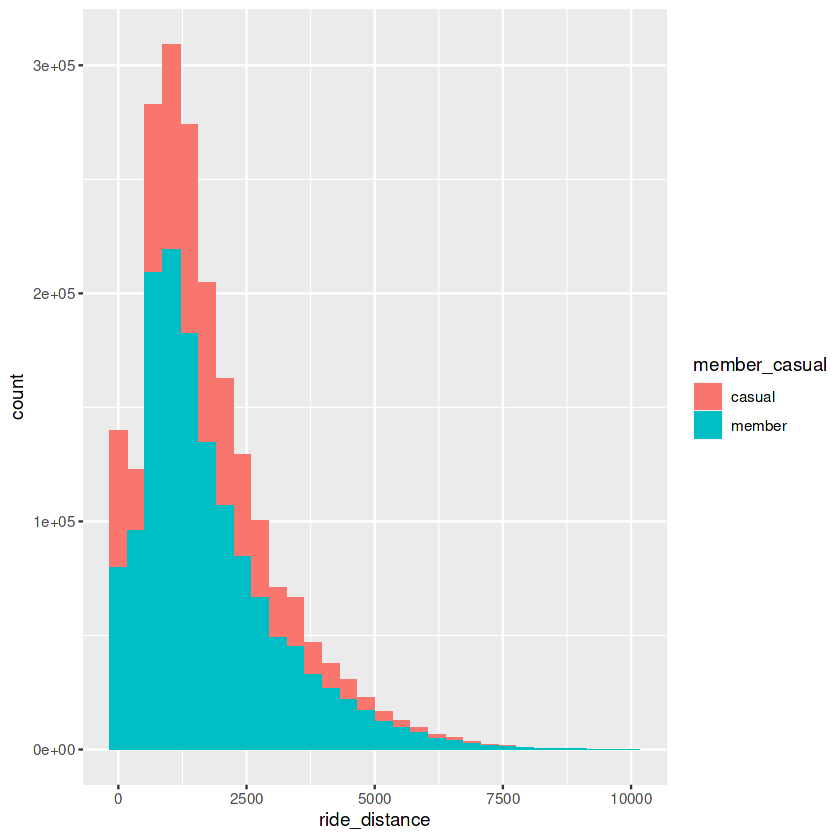

In [48]:
six_month2023_v3 %>%
    group_by(member_casual) %>%
    filter(ride_distance < 10000) %>% #Remove outliner
    ggplot(aes(x = ride_distance, fill = member_casual)) + 
    geom_histogram() #Disregard binwidth

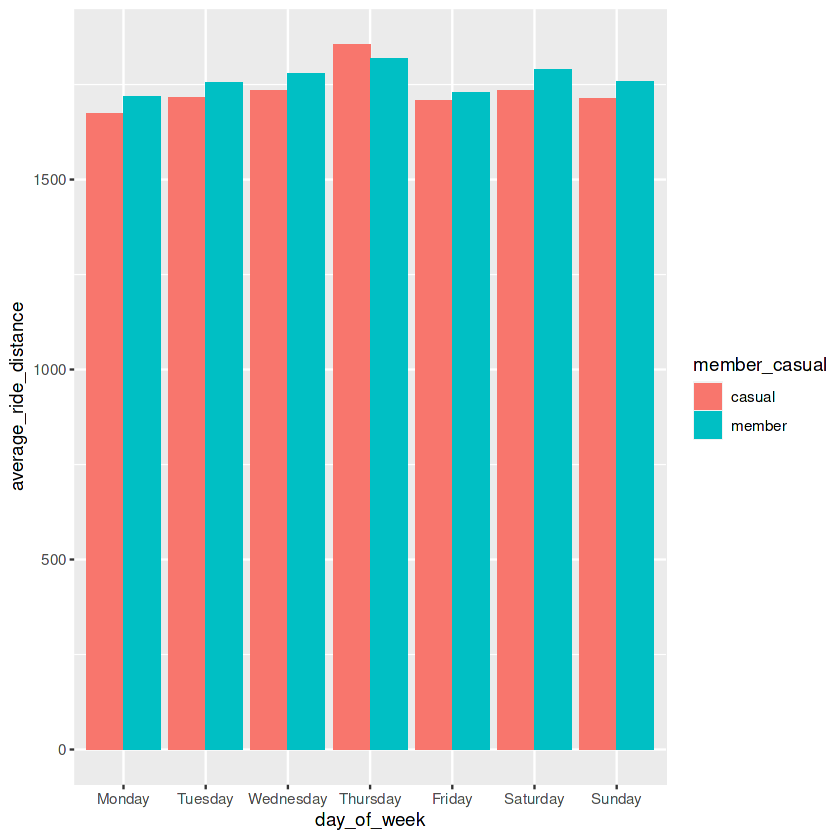

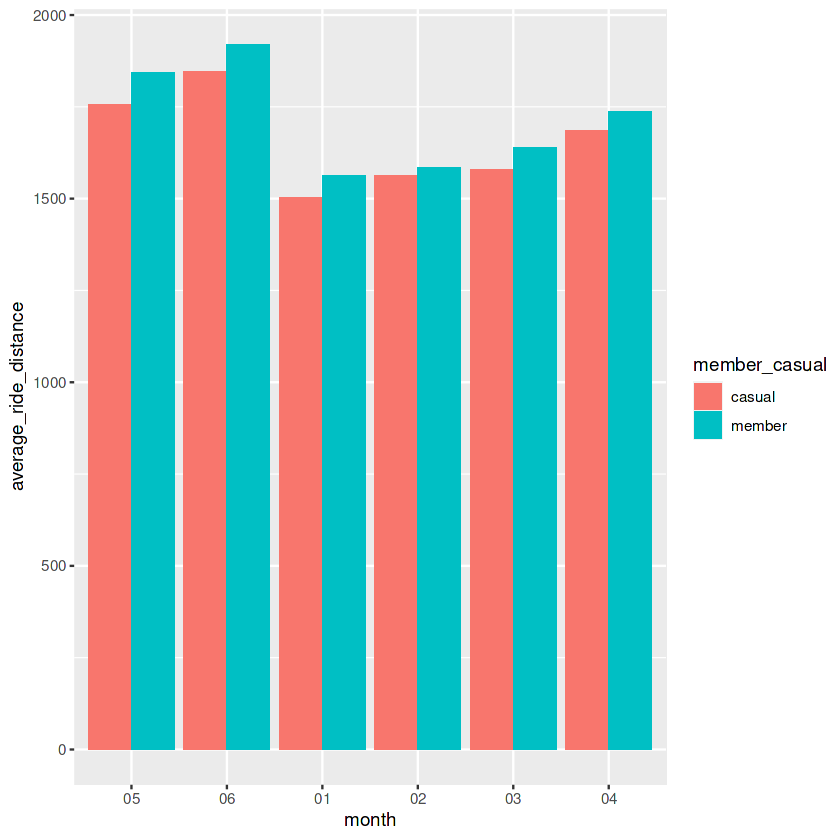

In [51]:
six_month2023_v3 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(average_ride_distance = mean(ride_distance), .groups = 'drop') %>%
    ggplot(aes(x = day_of_week, y = average_ride_distance, fill = member_casual)) +
    geom_bar(position = "dodge", stat = "identity")

six_month2023_v3 %>%
    group_by(member_casual, month) %>%
    summarise(average_ride_distance = mean(ride_distance), .groups = 'drop') %>%
    ggplot(aes(x = month, y = average_ride_distance, fill = member_casual)) +
    geom_bar(position = "dodge", stat = "identity")

**Analysis:**

1. It seems that the casual users travel the same average distance than the member users, but they have relatively longer rides, that would indicate a more leisure oriented usage vs a more "public transport" or pragmatic use of the bikes by the annual members.
2. Casual riders are more likely to return their bikes at the same station.
3. Additionaly, while that membership riders are more active on weekday, casual riders use the service more often over weekend. It lead me to conclude that membership riders use this service for their commute while casual rider use it for fun.

**Conclusion:**

1)The Casual users have leisure, and tourism rides mostly on weekends.

2)The Annual users have commute or pragmatic rides during weekdays.